In [49]:

# Feature Selection

# Irrelevant or partially relevant features can negatively impact model performance.

# https://scikit-learn.org/stable/modules/feature_selection.html

In [2]:
#Three benefits of performing feature selection before modeling your data are:

#Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
#Improves Accuracy: Less misleading data means modeling accuracy improves.
#Reduces Training Time: Less data means that algorithms train faster.

In [3]:
# 1. Univariate Selection

# 2. The Recursive Feature Elimination (or RFE)  - Filename: RFE
#    works by recursively removing attributes and building a model on those attributes that remain.
  # Test and Repeat 2- 3 times

In [4]:
# 3. Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.

# 4. Feature Importance: Bagged decision trees like Random Forest and Extra Trees

In [48]:
# Barley Data - Huge Columns
#

In [46]:
###########  Feature Importance   ############
import pandas as pd
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\Barley.csv')
#array = df.values
import numpy as np
from sklearn.preprocessing import StandardScaler
# split data table into data X and class labels y

X1 = df.iloc[:,1:330] # For Names

X = df.iloc[:,1:330].values
y = df.iloc[:,0].values

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y= labelencoder.fit_transform(y)
# feature extraction
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, y)
print(model.feature_importances_)

[0.00357254 0.00344345 0.00387564 0.0030417  0.00309992 0.003127
 0.00268543 0.00298185 0.00299127 0.00291745 0.00327982 0.00258753
 0.00291984 0.00252741 0.00291094 0.00272477 0.00277822 0.00312886
 0.00283405 0.0027488  0.00284911 0.00297416 0.00269229 0.0028199
 0.00290891 0.00279044 0.00286902 0.00270974 0.00249959 0.00273418
 0.00246594 0.00265678 0.00269255 0.00267876 0.00237963 0.0024896
 0.00307666 0.00255302 0.0022788  0.00287916 0.00328429 0.00257663
 0.00234002 0.00249316 0.00242507 0.00233117 0.00219635 0.00282939
 0.00244713 0.00262093 0.00271958 0.00265831 0.00259407 0.00237001
 0.00238093 0.00250662 0.00218557 0.00235275 0.00217355 0.00243775
 0.00234056 0.00238863 0.0025984  0.00244652 0.00226952 0.00237973
 0.0026478  0.00206766 0.00235635 0.00205216 0.00239183 0.00279916
 0.00199996 0.00238803 0.00214742 0.00200793 0.00235653 0.00224772
 0.00231295 0.00213867 0.00241199 0.00217098 0.00210696 0.00249681
 0.00212996 0.00209193 0.00250495 0.00235958 0.00194362 0.00211352

In [32]:
type(model.feature_importances_)

numpy.ndarray

In [ ]:
# numpy.ndarray  Filter by value

In [28]:
# Computing the importance of each feature
feature_importance = model.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        model.estimators_],
                                        axis = 0)

In [33]:
type(feature_importance_normalized)

numpy.ndarray

In [47]:
feature_importance_normalized

array([0.00237487, 0.00223337, 0.00243654, 0.00243698, 0.00214206,
       0.00196391, 0.0019843 , 0.00196015, 0.00244448, 0.00213987,
       0.00218674, 0.00185536, 0.00192768, 0.00232587, 0.00198076,
       0.00186342, 0.00189636, 0.00231419, 0.00216435, 0.00215653,
       0.00217835, 0.00189953, 0.00153275, 0.00196971, 0.00156627,
       0.00215921, 0.00180971, 0.00191884, 0.00190253, 0.00191106,
       0.00214521, 0.00222048, 0.00178807, 0.0023387 , 0.00193524,
       0.00187009, 0.00205926, 0.00196798, 0.00188399, 0.00216974,
       0.00210279, 0.00208784, 0.00190345, 0.00186666, 0.0019447 ,
       0.00169119, 0.00176661, 0.00199152, 0.00194615, 0.00171171,
       0.00198023, 0.00187553, 0.00218624, 0.0019002 , 0.00195997,
       0.0017539 , 0.00223316, 0.00187161, 0.00195431, 0.0020156 ,
       0.00168284, 0.00194833, 0.00194267, 0.00151444, 0.00178161,
       0.00172549, 0.00212761, 0.0020485 , 0.0017475 , 0.00160873,
       0.00205314, 0.00163571, 0.00182742, 0.00188905, 0.00159

In [27]:
X1.columns

Index(['740', '741', '742', '743', '744', '745', '746', '747', '748', '749',
       ...
       '1059', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067',
       '1068'],
      dtype='object', length=329)

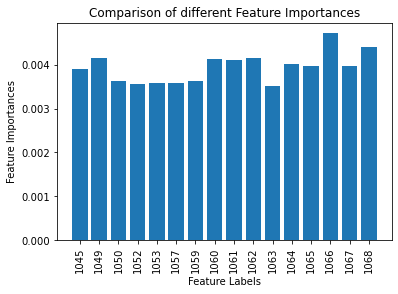

In [45]:
# Plotting a Bar Graph to compare the models
import matplotlib.pyplot as plt
# 0.0035
plt.bar(X1.columns[feature_importance_normalized >= 0.0035], feature_importance_normalized[feature_importance_normalized >= 0.0035])

# Logic: plt.plot(x[y <= 50], y[y <= 50])
#plt.bar(X1.columns, feature_importance_normalized)
plt.xlabel('Feature Labels' )
plt.ylabel('Feature Importances')
plt.xticks(rotation=90) # impt
# matplotlib y axis direction text label
plt.title('Comparison of different Feature Importances')
plt.show()

In [50]:
##  SelectKBest

In [56]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
#filename = 'pima-indians-diabetes.data.csv'
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = read_csv(filename, names=names)
#array = dataframe.values
#X = array[:,0:8]
#Y = array[:,8]

# feature extraction
test = SelectKBest(score_func=f_classif, k=6) # 6 columns
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=2)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])
#features

[ 4.49  4.47  4.44  4.43  4.43  4.44  4.45  4.47  4.47  4.48  4.48  4.49
  4.51  4.52  4.53  4.53  4.52  4.52  4.51  4.52  4.53  4.53  4.54  4.53
  4.53  4.52  4.52  4.53  4.53  4.53  4.53  4.52  4.52  4.52  4.52  4.53
  4.54  4.56  4.57  4.59  4.6   4.61  4.62  4.64  4.65  4.67  4.68  4.69
  4.7   4.7   4.71  4.72  4.73  4.73  4.74  4.75  4.74  4.74  4.74  4.74
  4.75  4.77  4.79  4.81  4.83  4.85  4.86  4.88  4.9   4.92  4.94  4.94
  4.94  4.93  4.94  4.95  4.98  5.    5.02  5.03  5.03  5.02  5.03  5.04
  5.05  5.07  5.07  5.07  5.08  5.09  5.11  5.14  5.16  5.17  5.18  5.19
  5.2   5.21  5.23  5.25  5.27  5.28  5.29  5.29  5.29  5.29  5.29  5.31
  5.33  5.36  5.38  5.4   5.42  5.44  5.47  5.5   5.52  5.53  5.53  5.53
  5.54  5.55  5.57  5.59  5.61  5.62  5.62  5.62  5.62  5.63  5.65  5.67
  5.68  5.7   5.71  5.74  5.77  5.81  5.84  5.87  5.88  5.88  5.89  5.9
  5.91  5.93  5.94  5.96  5.98  6.01  6.05  6.09  6.13  6.16  6.2   6.23
  6.25  6.28  6.31  6.33  6.36  6.4   6.44  6.49  6.

In [62]:
print(features[:10])

[[1.63 1.63 1.63 1.63 1.63 1.63]
 [1.64 1.64 1.64 1.64 1.64 1.64]
 [1.7  1.7  1.7  1.7  1.7  1.7 ]
 [1.75 1.75 1.75 1.75 1.75 1.75]
 [1.64 1.64 1.64 1.64 1.64 1.64]
 [1.72 1.72 1.72 1.72 1.72 1.72]
 [1.63 1.64 1.63 1.63 1.63 1.64]
 [1.73 1.73 1.73 1.73 1.73 1.73]
 [1.63 1.63 1.63 1.63 1.63 1.63]
 [1.62 1.62 1.62 1.62 1.62 1.62]]


In [69]:
# https://stackoverflow.com/questions/39839112/the-easiest-way-for-getting-feature-names-after-running-selectkbest-in-scikit-le
mask = test.get_support()
new_features = X1.columns[mask]

In [70]:
new_features

Index(['1058', '1059', '1065', '1066', '1067', '1068'], dtype='object')

In [54]:
#SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

#You can see the scores for each attribute and the 4 attributes chosen (those with the highest scores). 
#Specifically features with indexes 0 (preq), 1 (plas), 5 (mass), and 7 (age).

In [71]:
#Feature selection method: SelectKBest

#Score function:
#For regression: f_regression, mutual_info_regression
#For classification: chi2, f_classif, mutual_info_classif